<a href="https://colab.research.google.com/github/nstagnaro/mat281-repository/blob/main/PUB_INF_398_Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Introducci√≥n al Aprendizaje Autom√°tico: Taller 1

El objetivo de este taller consiste en familiarizarse con conceptos b√°sicos del aprendizaje autom√°tico y con herramientas que le permitan implementar modelos competitivos correctamente.


<table align='left'>
<tr>
<td><img src='https://upload.wikimedia.org/wikipedia/commons/f/f6/Balen_Minerva_among_the_Muses_%28detail%29.jpg' width='800'/> </td>
</tr>
</table>



# Problema

La m√∫sica (del griego: mousikƒì t√©chnƒì, "el arte de las musas") es una de las tradiciones m√°s antiguas y universales de la cultura humana. Desde los or√≠genes de la especie hasta nuestros d√≠as, la m√∫sica se ha desarrollado en un sin n√∫mero de g√©neros y estilos que, gracias la tecnolog√≠a, est√°n a s√≥lo un click de distancia.

En este notebook construiremos clasificadores para predecir el *g√©nero* de una canci√≥n usando datos obtenidos desde la conocida aplicaci√≥n *Spotify*.


# Datos

Utilizaremos un dataset denominado *Spotify Tracks DB*
proveniente [*kaggle.com*](https://www.kaggle.com/), plataforma en l√≠nea para competencias de ciencia de datos y aprendizaje autom√°tico con un gran n√∫mero desaf√≠os interesantes.


In [92]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=17tCpvpe14g2AxOgoEXi3JeHnud-YjdsS' -O T1ML_SpotifyTracksDB.csv

--2023-08-19 02:08:55--  https://docs.google.com/uc?export=download&id=17tCpvpe14g2AxOgoEXi3JeHnud-YjdsS
Resolving docs.google.com (docs.google.com)... 64.233.187.102, 64.233.187.139, 64.233.187.138, ...
Connecting to docs.google.com (docs.google.com)|64.233.187.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s377l14ti5u3loeckd72krgi0atf4hv3/1692410925000/12461978637957472934/*/17tCpvpe14g2AxOgoEXi3JeHnud-YjdsS?e=download&uuid=33470a39-403b-4bf5-b9eb-7e79ee50ff32 [following]
--2023-08-19 02:08:58--  https://doc-00-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s377l14ti5u3loeckd72krgi0atf4hv3/1692410925000/12461978637957472934/*/17tCpvpe14g2AxOgoEXi3JeHnud-YjdsS?e=download&uuid=33470a39-403b-4bf5-b9eb-7e79ee50ff32
Resolving doc-00-b8-docs.googleusercontent.com (doc-00-b8-docs.googleusercontent.com)... 64.233.187.132, 2404:6800:

El dataset describe las caracter√≠sticas de 232.000 canciones y sus correspondientes g√©neros. Las caracter√≠sticas incluyen:


*   Bailabilidad: Medida de qu√© tan adecuada es una canci√≥n para bailar, seg√∫n factores como la estabilidad y la fuerza del ritmo.

*   Energ√≠a: Representa la intensidad y el nivel de actividad de una canci√≥n.

*   Valencia: Tambi√©n conocido como "positividad", este atributo indica el estado de √°nimo o la emoci√≥n de una canci√≥n, que va desde triste hasta alegre.

*   Ac√∫stica: Mide la presencia de sonidos ac√∫sticos en una pista (es decir, sonidos sin procesamiento o intervenci√≥n electr√≥nica).

*   Instrumentalidad: Determina el grado de voces en una canci√≥n.

*   Vivacidad: Indica la presencia de una audiencia en vivo en la grabaci√≥n.

*   Habla: Refleja la cantidad de palabras habladas o contenido vocal en una pista.

*   Tempo: El "tempo" se refiere a la velocidad o ritmo al que se interpreta o se escucha una pieza de m√∫sica. En vez de recurrir a clasificaciones tradicionales como "adagio", "andante", "allegretto grazioso", Spotify Tracks DB mide el "tempo" en pulsos por minuto (BPM).

*   Comp√°s: Representa la estructura r√≠tmica de la canci√≥n. Est√° compuesta por dos n√∫meros apilados verticalmente, que generalmente aparecen al principio de una partitura. El n√∫mero superior representa la cantidad de tiempos por comp√°s. El n√∫mero inferior indica el tipo de nota que representa un tiempo. Por ejemplo, la canci√≥n "Ya no te espero" de Silvio Rodriguez est√° compuesta en 4/4.

*   Modo: Especifica si una pista est√° en una tonalidad mayor (feliz) o menor (triste).

# Instrucciones

Cada una de las siguientes secciones contiene preguntas que usted deber√° abordar en el video explicativo a enviar. Se evaluar√°n sus respuestas a cada secci√≥n (P1, P2, etc) y su nota se calcular√° como el promedio de todas las secciones.

Para evaluar cada parte se considerar√°:

*   Completitud: Se respondi√≥ o se hizo lo pedido?
*   Correctitud: Se abord√≥ lo pedido de modo t√©cnica o metodol√≥gicamente correcto?
*   Profundidad: Se demostr√≥ inter√©s, esp√≠ritu cr√≠tico, esp√≠ritu de investigaci√≥n, y estudio de las materias?
*   Claridad: Se explic√≥ de modo claro y sint√©tico lo realizado, destacando lo relevante sin caer en detalles superfluos?

Fuera de eso:

*   Originalidad: Se incluyen observaciones agudas e interesantes, o se hacen experimentos novedosos m√°s all√° de lo solicitado. Estos elementos sumar√°n puntos.

# Librer√≠as

Como ya es usual utilizaremos Python y su ecosistema b√°sico para ciencia de datos y machine learning. En particular emplearemos Scikit-learn (sklearn), una librer√≠a de alto nivel que proporciona varias herramientas para miner√≠a de datos y aprendizaje autom√°tico. Su facilidad de uso y eficiencia la convierte en una herramienta valiosa tanto por principiantes como por profesionales experimentados en el campo.
Puede modificar esto a su conveniencia.

In [1]:
# Plotting libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
# Scikit learn
import sklearn.preprocessing as skp
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
# Scikit Metrics
from sklearn.metrics import log_loss, classification_report, accuracy_score, f1_score,roc_auc_score
# Data manipulation libraries
import pandas as pd
import numpy as np
# General use
from joblib import dump, load
import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(8,4)})
plt.rcParams.update({'font.size': 8})
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend',fontsize=10)

## P1. Cargado de datos y Exploratorio

Como punto de partida conviene siempre explorar los datos disponibles, determinando con cu√°ntos cuenta, de qu√© tipos de datos se trata, cu√°ntas clases existen, etc.

In [21]:
data_path = ''
file_name = 'T1ML_SpotifyTracksDB.csv'

En la siguiente celda se carga el dataset como un dataframe de la librer√≠a *pandas*, que provee muchas funcionalidades para trabajar con datos tabulares.  

In [22]:
data_df = pd.read_csv(data_path + file_name)
display(data_df.head(5))

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les f√©es  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV         0.0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP         1.0         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy         3.0         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf         0.0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK         4.0         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0      99373.0   0.910             0.000  C#    0.3460    -1.828  Major   
1     137373.0   0.737             0.000  F#    0.1510    -5.559  Minor   
2     170267.0   0.131             0.000   C    0.1030   -13.879  Minor   
3     152427.0   0.326             0.000  C#    0.0985   -12.178  Major   
4      82625.0   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

Es f√°cil ver que existen varios datos faltantes, situaci√≥n com√∫n en la pr√°ctica.

In [23]:
nan_df = data_df[data_df.isna().any(axis=1)]
display(nan_df.head(5))

genre         artist_name  \
23   Movie  Jean Claude Corbel   
98     NaN  Richard M. Sherman   
116  Movie              Chorus   
141    R&B                 Nao   
166    R&B          Nick Jonas   

                                            track_name  \
23                          Pourquoi aller plus loin ?   
98                                    Forgotten Dreams   
116                           Swami Samartha Majhe Aai   
141                      Make It Out Alive (feat. SiR)   
166  Introducing Me - From "Camp Rock 2: The Final ...   

                   track_id  popularity  acousticness  danceability  \
23   15CpJP0LXchBUjpB8RKh8m         0.0         0.669         0.707   
98   3PyfS1XmjHk1JZ004a2bFZ         0.0           NaN         0.429   
116  3nGNIiz4PTsZ7cRhNNuSd2         0.0         0.228         0.684   
141  21Ft8ME799DMZjxNwmui6Z        64.0         0.667         0.670   
166  74tQaH4CxM5Rs9BzerEbHr        68.0         0.460           NaN   

     duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
23       71299.0  0.6960             0.000   C     0.197   -10.472  Major   
98       89947.0  0.0478             0.959   E     0.102   -14.170  Minor   
116     203492.0  0.7460             0.000  G#     0.196    -5.847  Major   
141     239147.0  0.6490               NaN   C     0.109    -7.426  Minor   
166     186893.0  0.4960             0.000   B     0.106    -6.049  Major   

     speechiness    tempo time_signature  valence  
23        0.0280  114.752            NaN    0.833  
98        0.0468   82.388            4/4    0.111  
116          NaN  107.854            4/4    0.745  
141       0.0875  147.935            4/4    0.618  
166       0.0511  113.072            4/4    0.676

In [24]:
print(len(nan_df)/len(data_df))
#print(data_df)

0.017845096143517026
        genre               artist_name                        track_name  \
0       Movie            Henri Salvador       C'est beau de faire un Show   
1       Movie         Martin & les f√©es  Perdu d'avance (par Gad Elmaleh)   
2       Movie           Joseph Williams    Don't Let Me Be Lonely Tonight   
3       Movie            Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Movie              Fabien Nataf                         Ouverture   
...       ...                       ...                               ...   
232720   Soul                     Slave                      Son Of Slide   
232721   Soul  Jr Thomas & The Volcanos                      Burning Fire   
232722   Soul              Muddy Waters    (I'm Your) Hoochie Coochie Man   
232723   Soul                   R.LUM.R                     With My Words   
232724   Soul            Mint Condition    You Don't Have To Hurt No More   

                      track_id  popularity  acousticn

*  Por simplicidad se eliminanemos todas las filas (registros) con datos faltantes. ¬øEs esto una buena pr√°ctica? Comente.

In [26]:
data_df = data_df.dropna()

#Creemos que es una buena practica eliminar los nan, puesto que estos pueden ser perjudiciales a la hora de querer trabajar con
#los datos, al generarse errores en la ejecucion de codigo, por ejemplo al calcular ciertos estadisticos
#(poner algo mas si se nos ocurre)

In [27]:
print(f'Datos presentes: {len(data_df)}')
print(data_df)
print("Columnas del dataset:\n", data_df.columns.values)

Datos presentes: 228572
        genre               artist_name                        track_name  \
0       Movie            Henri Salvador       C'est beau de faire un Show   
1       Movie         Martin & les f√©es  Perdu d'avance (par Gad Elmaleh)   
2       Movie           Joseph Williams    Don't Let Me Be Lonely Tonight   
3       Movie            Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Movie              Fabien Nataf                         Ouverture   
...       ...                       ...                               ...   
232720   Soul                     Slave                      Son Of Slide   
232721   Soul  Jr Thomas & The Volcanos                      Burning Fire   
232722   Soul              Muddy Waters    (I'm Your) Hoochie Coochie Man   
232723   Soul                   R.LUM.R                     With My Words   
232724   Soul            Mint Condition    You Don't Have To Hurt No More   

                      track_id  popularity  acoust

* Determine los distintos g√©neros presentes en el dataset y comente. ¬øDetecta alguna irregularidad en los datos? Si es as√≠, proponga una soluci√≥n.


In [19]:
genres = data_df['genre'].unique()
print("\nG√©neros:\n", genres)


G√©neros:
 ['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children‚Äôs Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']


* Gr√°fique la cantidad de canciones por g√©nero y comente, ¬øQu√© ocurrir√° si creamos un modelo de clasificaci√≥n en torno a esta columna?. ¬øNota alguna anomal√≠a que pueda afectar el entrenamiento? Si es as√≠, proponga una soluci√≥n.

*Hint: Use the all powerful seaborn library for plotting*

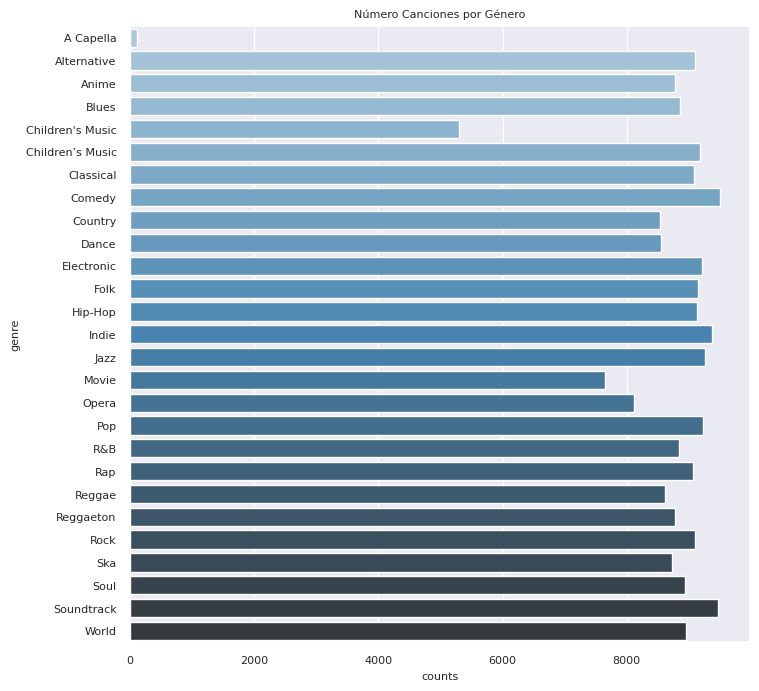

In [77]:
gr = data_df.groupby(['genre']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,8),nrows=1)
sns.barplot(data=gr, y='genre', x='counts', palette="Blues_d", ax=ax)
ax.set_title('N√∫mero Canciones por G√©nero',size=8)
plt.show()

* Note que hay una clase con errores de escritura. Rep√°rela.

In [20]:
data_df.loc[data_df['genre']=="Children‚Äôs Music", 'genre'] = "Children's Music"

* Gr√°fique los 30 artistas m√°s populares y comente sobre la distibuci√≥n de estos.

*Hint: Use the all powerful seaborn library for plotting*

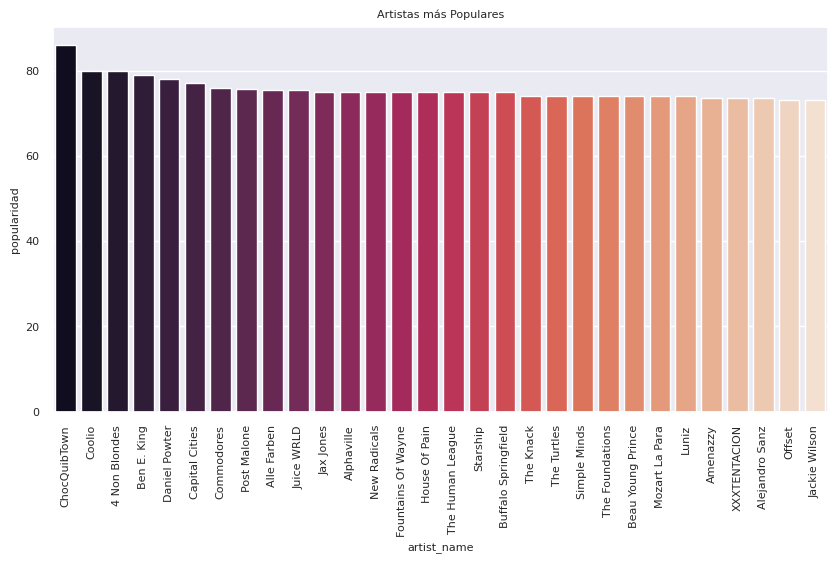

In [114]:
gr = data_df.groupby(['artist_name'])['popularity'].mean().sort_values(ascending=False)
gr = gr.reset_index(name='popularidad').head(30)
fig, ax = plt.subplots(figsize=(10,5),nrows=1)
p = sns.barplot(data=gr, x='artist_name', y='popularidad', palette="rocket",ax=ax)
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Artistas m√°s Populares',size=8)
plt.show()

## P2. Pre-procesamiento e Ingenier√≠a de Atributos

El objetivo de esta secci√≥n es que aprenda a preparar los datos correctamente antes de aplicar un m√©todo de aprendizaje cl√°sico y que eventualmente modifique/seleccione el conjunto de atributos que sobre los que entrenar√° el modelo. Por el lado m√°s pr√°ctico, podr√° familiarizarse con diferentes funcionalidades de la librer√≠a sklearn.



* Elija los 5 g√©neros m√°s releventes para usted y filtre el dataset para obtener solo datos pertenecientes a los g√©neros de inter√©s. Re-examine la distribuci√≥n de ejemplos por clase. Repita la gr√°fica de 1.2 y comente *Hint: You might find Pandas "isin" method useful.*

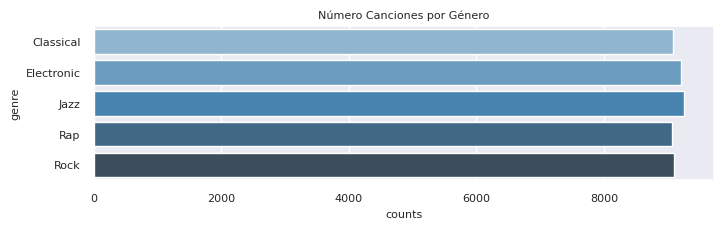

In [117]:
genres = ['Classical','Electronic','Jazz','Rock','Rap']#cambiar como desee
data_df = data_df[data_df['genre'].isin(genres)]
genre_to_number = {label: i for i, label in enumerate(set(genres), 0)}
number_to_genre = {i: label for i, label in enumerate(set(genres), 0)}

gr = data_df.groupby(['genre']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,2),nrows=1)
sns.barplot(data=gr, y='genre', x='counts', palette="Blues_d", ax=ax)
ax.set_title('N√∫mero Canciones por G√©nero', size=8)
plt.show()

In [118]:
print(data_df['genre'].unique())

['Electronic' 'Rap' 'Classical' 'Jazz' 'Rock']


* Grafique las variables categ√≥ricas y continuas por g√©nero. Comente se√±alando qu√© variables considera que permiten diferenciar mejor los g√©neros y cu√°les no. Reflexione sobre el impacto de mantener o quitar estos atributos del dataset. *Hint: Create one figure plot for continous variables and other for categorical.*

* Seleccionar caracter√≠sticas permite reducir la dimensionalidad y mejorar la eficiencia del modelo a entrenar. Si le obligar√°n a construir un modelo que use $5 \pm 2$ caracter√≠sticas, ¬øCu√°les elegir√≠a en base a la informaci√≥n disponible en esta etapa?

['genre' 'artist_name' 'track_name' 'track_id' 'popularity' 'acousticness'
 'danceability' 'duration_ms' 'energy' 'instrumentalness' 'key' 'liveness'
 'loudness' 'mode' 'speechiness' 'tempo' 'time_signature' 'valence']


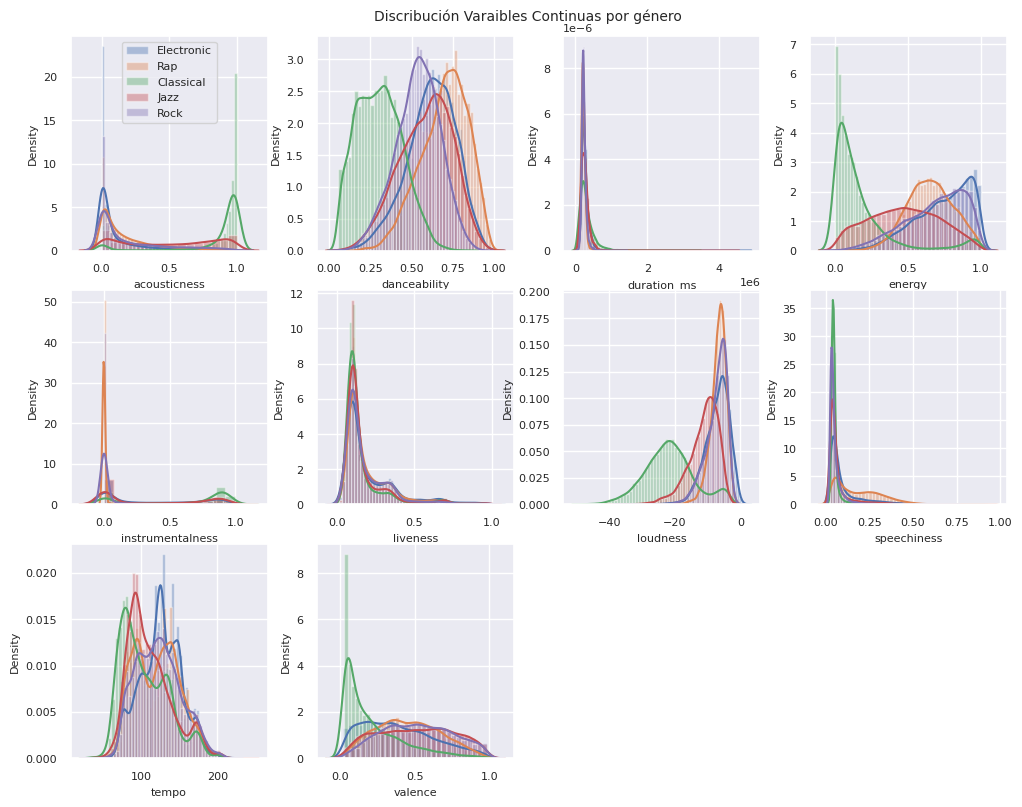

In [120]:
print(data_df.columns.values)

# Variables continuas
cont_predictors_names = ['acousticness','danceability','duration_ms','energy',
                         'instrumentalness','liveness','loudness','speechiness',
                         'tempo','valence']
# Variables categoricas
cat_predictors = ['mode','time_signature','key']
other_predictors = ['genre','artist_name','track_name','track_id']


fig, axes = plt.subplots(figsize=(10,8), nrows=3, ncols=4)
fig.suptitle('Discribuci√≥n Varaibles Continuas por g√©nero', fontsize=10)
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
for i, column in enumerate(cont_predictors_names):
    #print(i//3, i%3)
    for genre in data_df['genre'].unique():
      target = data_df.loc[data_df['genre'] == genre]
      sns.distplot(target[column], hist=True, rug=False, kde=True,
                   ax=axes[i//4,i%4], label=genre)
      if i==0:
        axes[0,0].legend(prop={'size': 8})


axes[-1,-2].axis('off')
axes[-1,-1].axis('off')
plt.show()


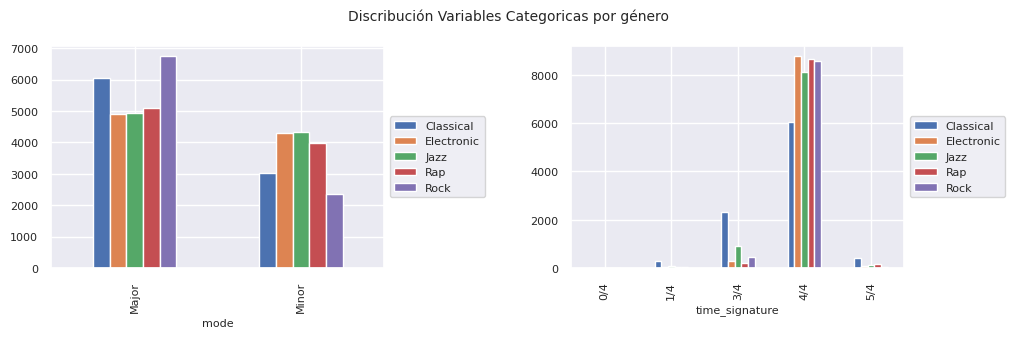

In [121]:
fig, axes = plt.subplots(figsize=(10,3), nrows=1, ncols=2)
fig.suptitle('Discribuci√≥n Variables Categoricas por g√©nero', fontsize=10)
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
for i, column in enumerate(cat_predictors[:-1]):
  df_gb = data_df.groupby([column, 'genre']).size().unstack(level=1)
  df_gb.plot(kind='bar', ax=axes[i%3])
  box = axes[i%3].get_position()
  axes[i%3].set_position([box.x0, box.y0, box.width * 0.8, box.height])
  axes[i%3].legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 8})

plt.show()


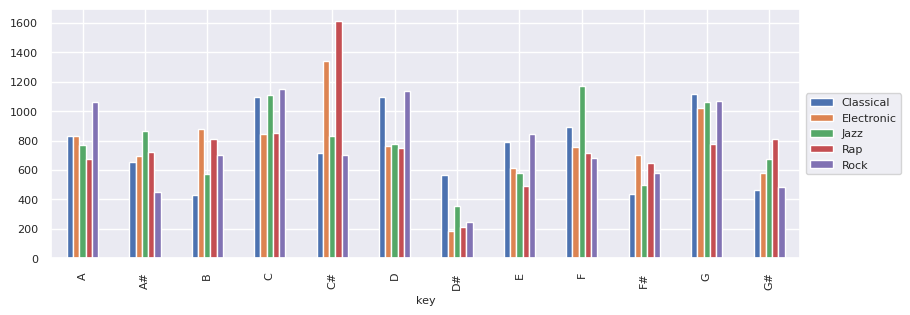

In [122]:
fig, ax = plt.subplots(figsize=(10,3), nrows=1, ncols=1)
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
df_gb = data_df.groupby(['key', 'genre']).size().unstack(level=1)
df_gb.plot(kind = 'bar',ax=ax)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 8})

plt.show()

La etapa de preprocesamiento es un paso crucial en el aprendizaje autom√°tico que implica preparar y limpiar los datos para mejorar el rendimiento de los modelos. Ya hemos "tratado" *datos faltantes* y hemos considerado la posibilidad de *seleccionar caracter√≠sticas*. Tambi√©n explorar la presencia de valores at√≠picos para garantizar la calidad de los datos.






* Determine si existen atributos continuos con valores at√≠picos usando alguna herramienta de visualizaci√≥n. *Hint: Consider the use of boxplots and exploit the all power of seaborn library for plotting.*

Otras operaciones t√≠picas de pre-procesamiento incluyen:



1. Escalado de Caracter√≠sticas: Estandarizar o normalizar caracter√≠sticas para asegurar que est√©n en escalas similares, lo que ayuda a algoritmos sensibles a diferencias de magnitud.
2. Codificaci√≥n de Caracter√≠sticas Categ√≥ricas: Convertir variables categ√≥ricas en representaciones num√©ricas para compatibilidad con modelos.

* Para los Atributos continuos, investigue sobre el m√≥dulo *preprocessing* de scikit learn, espec√≠ficamente la secci√≥n: *Preprocessing and Normalization*. A partir de lo anterior determine qu√© normalizador es m√°s adecuado para cada atributo, explique el porqu√© de las elecciones (si sus elecciones son justificadas experimentalmente, indique claramente su metodolog√≠a). Si no necesita realizar normalizaci√≥n sobre un atributo, explique por qu√©. Una vez que haya elegido sus normalizadores, apl√≠quelos a las columnas correspondientes.

* Para los atributos categ√≥ricos, al igual que los continuos, investigue sobre el m√≥dulo preprocessing de scikit learn, espec√≠ficamente la secci√≥n: Preprocessing and Normalization, sin embargo, ahora f√≠jese en los Encoders. Determine que encoder le conviene dependiendo de los atributos categ√≥ricos y de su variable objetivo, explique el porqu√© de las elecciones (si sus elecciones son justificadas experimentalmente, indique claramente su metodolog√≠a). Aplique los encoders determinados sobre los atributos y la columna objetivo.


* Para los atributos categ√≥ricos, al igual que los continuos, investigue sobre el m√≥dulo preprocessing de scikit learn, espec√≠ficamente la secci√≥n: Preprocessing and Normalization, sin embargo, ahora f√≠jese en los Encoders. Determine que encoder le conviene dependiendo de los atributos categ√≥ricos y de su variable objetivo, explique el porqu√© de las elecciones (si sus elecciones son justificadas experimentalmente, indique claramente su metodolog√≠a). Aplique los encoders determinados sobre los atributos y la columna objetivo.

De lo visto en clases podr√° recordar que la representaci√≥n de los datos afecta la complejidad de resolver la tarea final. En su caso, ya se dispone de varios atributos de alto nivel para hacer la predicci√≥n, pero de todos modos es posible "crear" atributos adicionales que "expandan" el espacio de caracter√≠sticas original. La celda que sigue crea atributos polinomiales a partir de los atributos continuos.



*   Prepare estos nuevos atributos apropiadamente en un dataframe separado de modo de poder evaluar su efectividad m√°s adelante.

In [67]:
from sklearn.preprocessing import PolynomialFeatures

cont_predictors_names = ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']
cat_predictors = ['mode','time_signature','key']

cont_features = data_df[cont_predictors_names]
cat_features = data_df[cat_predictors]

poly = PolynomialFeatures(degree=3,include_bias=False)
expanded_features = poly.fit_transform(cont_features.values)
cont_predictors_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(cont_predictors_names,p) for p in poly.powers_]]
expanded_data = pd.DataFrame(expanded_features, columns = cont_predictors_names)
#puede concatenar
X = pd.concat([expanded_data.reset_index(drop=True),cat_features.reset_index(drop=True)],axis=1)
display(X.head(5))

acousticness^1  danceability^1  duration_ms^1  energy^1  \
0        0.153000           0.841       212500.0     0.798   
1        0.077100           0.652       205947.0     0.713   
2        0.074200           0.536       192000.0     0.879   
3        0.020300           0.586       220573.0     0.701   
4        0.000726           0.793       450800.0     0.703   

   instrumentalness^1  liveness^1  loudness^1  speechiness^1  tempo^1  \
0            0.000003      0.0618      -4.206         0.2290   95.948   
1            0.000010      0.1440      -5.311         0.0368  100.023   
2            0.000000      0.0847      -3.019         0.0621  140.137   
3            0.000000      0.0550      -5.326         0.0416  104.957   
4            0.880000      0.0750      -9.548         0.0581  130.270   

   valence^1  ...  speechiness^1xtempo^2  speechiness^1xtempo^1xvalence^1  \
0      0.591  ...            2108.178283                        12.985506   
1      0.152  ...             368.169299                         0.559489   
2      0.334  ...            1219.543322                         2.906638   
3      0.254  ...             458.264429                         1.109018   
4      0.856  ...             985.972855                         6.478796   

   speechiness^1xvalence^2       tempo^3  tempo^2xvalence^1  \
0                 0.079985  8.832991e+05        5440.757054   
1                 0.000850  1.000690e+06        1520.699280   
2                 0.006928  2.752063e+06        6559.218509   
3                 0.002684  1.156203e+06        2798.056850   
4                 0.042572  2.210717e+06       14526.553602   

   tempo^1xvalence^2  valence^3   mode  time_signature  key  
0          33.512813   0.206425  Minor             4/4   C#  
1           2.310931   0.003512  Major             4/4   G#  
2          15.633123   0.037260  Major             4/4   C#  
3           6.771406   0.016387  Minor             4/4   C#  
4          95.453519   0.627222  Major             4/4    C  

[5 rows x 288 columns]

## P3. Conjunto de Entrenamiento, Validaci√≥n y Pruebas


El objetivo de esta secci√≥n es que aprenda a generar sus propios conjuntos de entrenamiento, validaci√≥n y Prueba. Comprendiendo correctamente el uso de cada uno en las distintas etapas de generaci√≥n de modelos de aprendizaje autom√°tico.

* Divida su conjunto de datos en entrenamiento, prueba y validaci√≥n. Tome en cuenta la necesidad de *reproducibilidad* al momento de hacer los splits (muy com√∫n en ciencia). Justifique adecuadamente el tama√±o de cada conjunto. *Hint: You might find "train_test_split" pretty useful here*.

In [142]:
from sklearn.model_selection import train_test_split

* Explique cu√°l es el rol del conjunto de entrenamiento en la creaci√≥n de modelos de aprendizaje autom√°tico.

* Se√±ale cu√°l es el rol del conjunto de pruebas en la creaci√≥n de modelos de aprendizaje autom√°tico.

* Indique la funci√≥n que cumple el conjunto de validaci√≥n en la creaci√≥n de modelos de aprendizaje autom√°tico.


## P4. El Perceptr√≥n

El objetivo de esta secci√≥n consiste en aprender a entrenar un perceptr√≥n y evaluarlo usando m√©tricas y m√©todos apropiados.


* Entrene un perceptr√≥n para clasificar los g√©neros de las canciones. Como el perceptr√≥n es nativamente binario, conc√©ntrese primero en 2 g√©neros. Para comenzar, implemente el m√©todo "from scratch" sin los "add-ons" que suele tener en implementaciones "modernas". Determine si observa convergencia y comente. ¬øDepende lo anterior de la elecci√≥n de la *tasa de aprendizaje*? ¬øObserva diferencias entre los m√©todos denominados "train_online" y "train"?

In [ ]:
"""
WARNING: Los m√©todos para entrenar el modelo (train y train_online) asumen que X es una matriz de nxd.
El n√∫mero de filas (n) es el n√∫mero de ejemplos y el n√∫mero de columnas (d) es el n√∫mero total de caracter√≠sticas.
Por otro lado Y se asume una matriz de nx1 que identifica la clase a la que pertenece c/dato.
Los datos de la clase positiva est√°n codificados como +1 y los datos de la otra clase como -1.
"""

def predict(x,w,b):
  log_odd = b
  for i in range(len(w)):
    log_odd += w[i] * x[i]
  return 1.0 if log_odd >= 0.0 else -1.0

def eval(X,Y,w,b):
  mistakes = 0.0
  for idx in range(len(X)):
    prediction = predict(X[idx,:], w, b)
    if Y[idx]*prediction < 0:
      mistakes += 1.0
  miss_rate = mistakes/float(len(X))
  return miss_rate

def train_online(X,Y,eta=1,n_epochs=5,tolerance=0):
  w = [0.0 for i in range(X.shape[1])]; b = 0.0;
  history = []
  for epoch in range(n_epochs):
    mistakes = 0.0
    for idx in range(len(X)):
      prediction = predict(X[idx,:], w, b)
      if Y[idx]*prediction < 0:
        w = w + eta*Y[idx]*X[idx,:]
        b = b + eta*Y[idx]
        mistakes += 1.0
      if idx%10 == 0:
        miss_rate_history = eval(X,Y,w,b)
        history.append(miss_rate_history)
        #print('.... %d examples, miss_rate=%.3f'%(idx+1, miss_rate_history))
    miss_rate = mistakes/len(X)
    print('> epoch=%d, miss_rate=%.3f' % (epoch+1, miss_rate))
    if miss_rate < tolerance:
      return w,b,history
  return w,b,history

def train(X,Y,eta=1,n_epochs=5,tolerance=0):
  w = [0.0 for i in range(X.shape[1])]; b = 0.0;
  history = []
  etat = eta
  for epoch in range(n_epochs):
    mistakes = 0.0
    delta_w=np.zeros_like(w); delta_b=0;
    for idx in range(len(X)):
      prediction = predict(X[idx,:], w, b)
      if Y[idx]*prediction < 0:
        delta_w+=etat*Y[idx]*X[idx,:]
        delta_b+=etat*Y[idx]
        mistakes += 1.0
      if idx%100 == 0:
        w = w + delta_w/100
        b = b + delta_b/100
        delta_w=0; delta_b=0;
        etat = eta/(1+(epoch*idx/100))
        miss_rate_history = eval(X,Y,w,b)
        history.append(miss_rate_history)
    miss_rate = mistakes/len(X)
    print('> epoch=%d, miss_rate=%.3f' % (epoch+1, miss_rate))
    if miss_rate < tolerance:
      return w,b,history
  return w,b,history

* Compare la exactitud obtenida (accuracy) con la exactitud de un clasificador que elige aleatoriamente la clase a predecir. Verifique experimentalmente su respuesta.

* Visualice el peso que el modelo asigna a las diferentes caracter√≠sticas y comente.

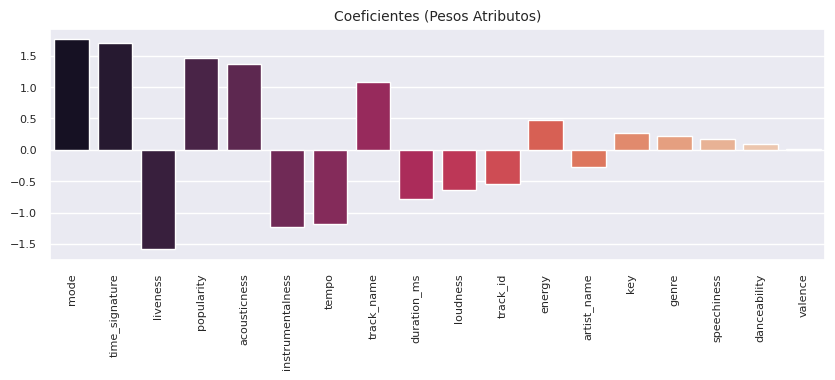

In [84]:
data_used = data_df

column_names = data_used.columns
#use su w entrenado
w = np.random.uniform(-2, 2, size=len( data_used.columns))
max_feat = min(len(w),20)
sorted_idx = np.argsort(np.abs(w))[::-1]

fig, ax = plt.subplots(figsize=(10,3),nrows=1)
p = sns.barplot(x=np.arange(max_feat), y=[w[idx] for idx in sorted_idx[:max_feat]], palette="rocket",ax=ax)
ax.set_xticklabels([column_names[idx] for idx in sorted_idx[:max_feat]])
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Coeficientes (Pesos Atributos)',size=10)
plt.show()

* Mencione tres m√©tricas relevantes para un problema de clasificaci√≥n multiclase que vayan m√°s all√° de "exactitud" (accuracy). Comente detalladamente sus diferencias y relevancias. Desde ac√° en adelante puede emplear el m√©todo Perceptron disponible en sklearn.


In [133]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report

n_classes = 5
base = Perceptron(tol=1e-3,eta0=0.1,random_state=123)
clf = base.fit(X_train.values, y_train.values)
target_names = [number_to_genre[i] for i in clf.classes_]
print(classification_report(y_train.values,clf.predict(X_train.values), target_names=target_names))

              precision    recall  f1-score   support

        Jazz       0.44      0.42      0.43      5990
   Classical       0.69      0.64      0.66      5795
        Rock       0.54      0.60      0.57      5801
  Electronic       0.62      0.42      0.50      5822
         Rap       0.58      0.78      0.67      5856

    accuracy                           0.57     29264
   macro avg       0.57      0.57      0.56     29264
weighted avg       0.57      0.57      0.56     29264




* Para manejar m√∫ltiples clases, utilice primero el m√©todo **"One versus the Rest"** y luego el m√©todo **"OneVsOne"**. Comp√°relos adecuadamente usando las 3 m√©tricas definidas anteriormente. Mida tambi√©n el tiempo de entrenamiento.

In [ ]:
clf = OneVsOneClassifier(base).fit()


* ¬øQu√© t√©cnica (OVO vs OVR) muestra mejor desempe√±o en entrenamiento?

* ¬øQu√© t√©cnica (OVO vs OVR) muestra mejor capacidad de generalizaci√≥n?

* Elija uno de los modelos y estime su error de predicci√≥n si se decidiera operar con √©l en la tarea.



### Guardar

El c√≥digo de m√°s abajo guarda un modelo. Si usted entren√≥ un modelo con buen desempe√±o puede valer la pena ejecutar este paso.

In [ ]:
dump(model, 'filename.joblib')

## P5.  El Regresor Log√≠stico

* Entrene un regresor log√≠stico para clasificaci√≥n. Este m√©todo puede trabajar directamente con m√∫ltiples clases, pero de todos modos es posible entrenarlo usando **"One versus the Rest"** y **"OneVsOne"**. Compare las 3 metodolog√≠as usando las 3 m√©tricas definidas en la secci√≥n anterior. Mida tambi√©n el tiempo de entrenamiento.


In [134]:
#adaptar y completar consistentemente
n_classes = 5
base = LogisticRegression()
clf = OneVsOneClassifier(base).fit(X_train.values, y_train.values)

* Visualice la matriz de confusi√≥n correspondiente al modelo entrenado. Comente cu√°les son las clases que m√°s se confunden.

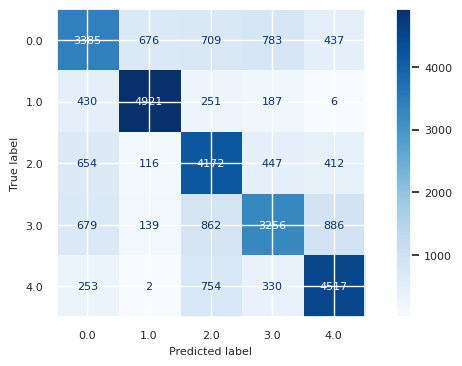

In [141]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train.values, clf.predict(X_train.values), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap = "Blues")

* ¬øAnticipa el error de entrenamiento el error de predicci√≥n observado? ¬øAnticipa el desempe√±o sobre el conjunto de validaci√≥n el error de predicci√≥n observado?

* Una vez elegida una de las 3 t√©cnicas para entrenar el modelo multi-clase, ¬øEs correcto unir el conjunto de validaci√≥n con el conjunto de entrenamiento para re-entrenar el modelo elegido? ¬øConviene hacerlo en este caso?

* Visualice el peso que cada clasificador en OVO asigna a las diferentes caracter√≠sticas y comente.


Coeficientes LR + OVO

Par 0,1 - Jazz vs Classical
Par 0,2 - Jazz vs Rock
Par 0,3 - Jazz vs Electronic
Par 0,4 - Jazz vs Rap
Par 1,2 - Classical vs Rock
Par 1,3 - Classical vs Electronic
Par 1,4 - Classical vs Rap
Par 2,3 - Rock vs Electronic
Par 2,4 - Rock vs Rap
Par 3,4 - Electronic vs Rap




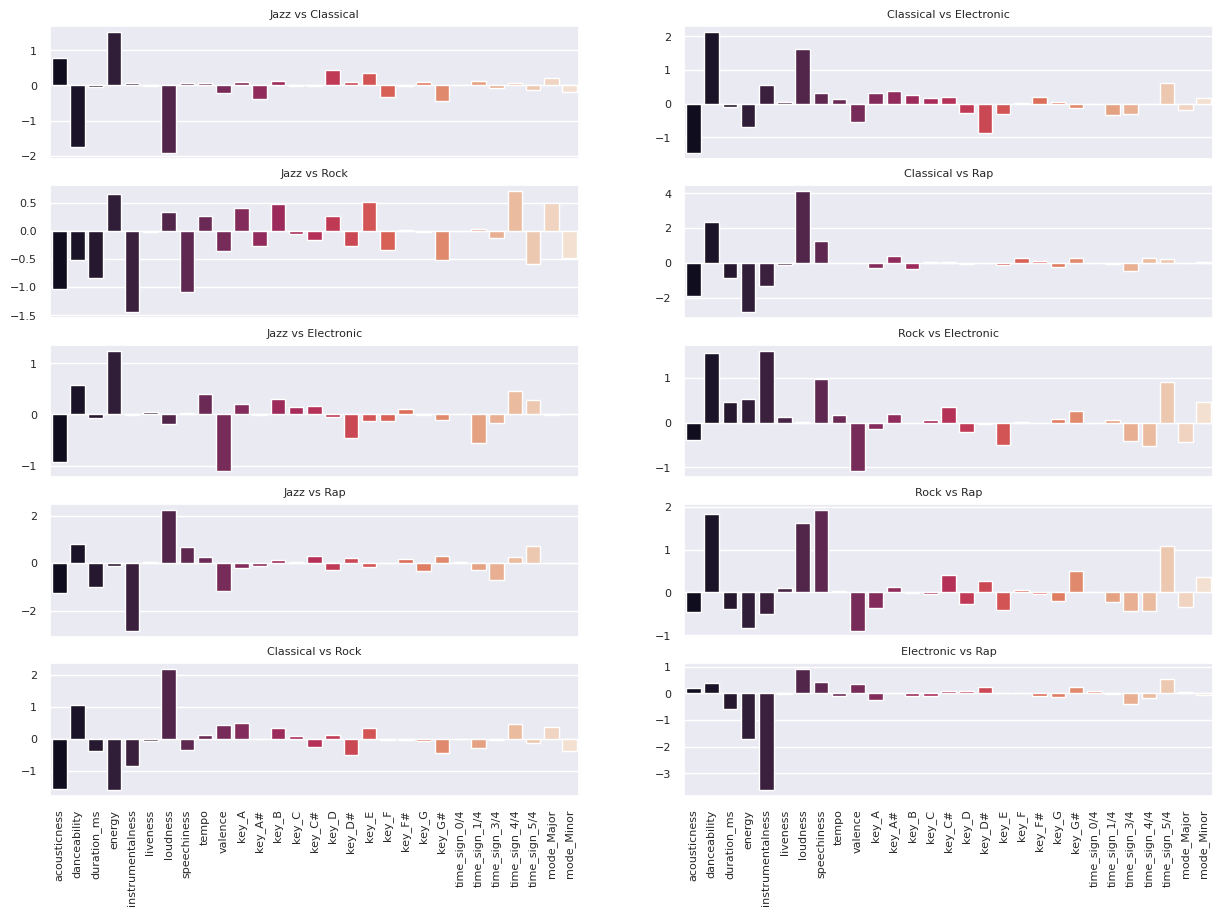

In [110]:
#genres = ['Classical','Electronic','Jazz','Rock','Rap']
#number_to_genre = {i: label for i, label in enumerate(set(genres), 0)}

fig, axes = plt.subplots(figsize=(15,10),nrows=5,ncols=2,sharex=True,sharey=False,squeeze=False)

print("\nCoeficientes LR + OVO\n")

counter = 0

for i in range(len(clf.classes_)):
  for j in range(i+1,len(clf.classes_)):
    estimator = clf.estimators_[counter]
    class1 = number_to_genre[clf.classes_[i]]
    class2 = number_to_genre[clf.classes_[j]]
    print("Par %d,%d - %s vs %s"%(i,j,class1,class2))
    w = estimator.coef_[0,:]
    b = estimator.intercept_

    max_feat = min(len(w),30)

    p=sns.barplot(x=np.arange(max_feat),y=w[:max_feat],palette="rocket",ax=axes[counter%5,counter//5],orient="v")
    axes[counter%5,counter//5].set_xticklabels(X.columns[:max_feat],fontsize=11)
    axes[counter%5,counter//5].set_title('%s vs %s'%(class1,class2),size=8)
    plt.setp(p.get_xticklabels(), rotation=90,size=8)

    counter+=1

print("\n")
plt.show()


* Averigue en qu√© consiste la t√©cnica denominada "permutation importance" de sklearn y √∫sela para estimar la importancia de cada atributo en el clasificador multi-clase obtenido v√≠a OVO.


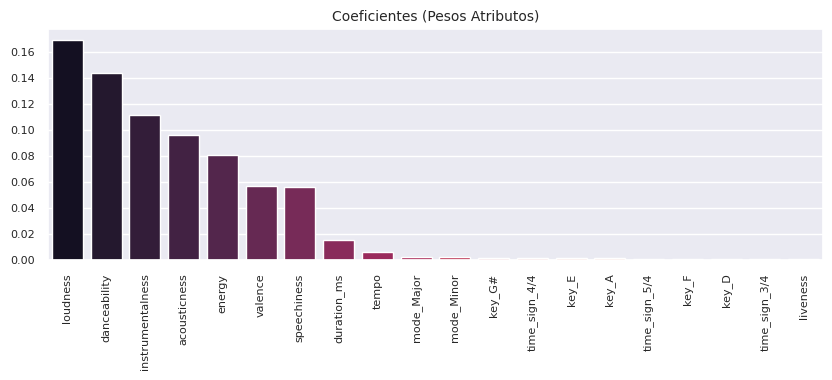

In [125]:
from sklearn.inspection import permutation_importance
model_fi = permutation_importance(clf,X_train.values, y_train.values)

w = model_fi['importances_mean']
column_names = X_train.columns
max_feat = min(len(w),20)
sorted_idx = np.argsort(np.abs(w))[::-1]

fig, ax = plt.subplots(figsize=(10,3),nrows=1)
p = sns.barplot(x=np.arange(max_feat), y=[w[idx] for idx in sorted_idx[:max_feat]], palette="rocket",ax=ax)
ax.set_xticklabels([column_names[idx] for idx in sorted_idx[:max_feat]])
plt.setp(p.get_xticklabels(), rotation=90)
ax.set_title('Coeficientes (Pesos Atributos)',size=10)
plt.show()

* Como el regresor log√≠stico es un clasificador probabilista, es posible obtener directamente (sin heur√≠sticas) la incerteza de la predicci√≥n. Proponga un m√©todo que use esta informaci√≥n para rechazar la predicci√≥n de un % peque√±o de datos de test. Determine si su m√©todo mejora las m√©tricas del modelo log√≠stico multi-class (obtenido sin heur√≠sticas de agregaci√≥n) cuando se eval√∫a sobre los datos que s√≠ se predice.

In [127]:
clf = LogisticRegression()
clf = clf.fit(X_train.values, y_train.values)
probs_train = clf.predict_proba(X_train.values)
print(probs_train)

[[1.14774252e-02 4.35069352e-05 4.16274801e-02 1.37673600e-01
  8.09177988e-01]
 [3.51716945e-01 1.10373350e-02 2.59441536e-01 3.71096516e-01
  6.70766816e-03]
 [6.74081288e-02 2.21221233e-02 5.48097099e-02 8.55528750e-01
  1.31288239e-04]
 ...
 [3.03710283e-02 1.49208248e-03 3.76431695e-02 8.81367878e-01
  4.91258418e-02]
 [3.02203143e-02 9.58575943e-01 1.00621514e-02 9.59460751e-04
  1.82130280e-04]
 [7.61917057e-01 9.36810570e-02 9.28655550e-02 1.17989865e-02
  3.97373441e-02]]


## P6. Validaci√≥n Cruzada

*  Estime el error de prediccion de dos modelos a elecci√≥n utilizando validaci√≥n cruzada (CV). Para esto, una el conjunto de entrenamiento con el de validaci√≥n y monitoree varias m√©tricas de las elegidas anteriormente, incluyendo exactitud (accuracy). ¬øEs conveniente el uso de validaci√≥n cruzada en lugar de un conjunto de validaci√≥n? Concluya. *Hint: Look up "cross_validate" function in scikit learn.*

* Eval√∫e los modelos sobre el conjunto de prueba. ¬øEl uso de validaci√≥n cruzada permiti√≥ estimar mejor el comportamiento de los modelos en el conjunto de pruebas? Concluya.


* Cargue su mejor modelo.

In [ ]:
clasiffier_model = load('filename.joblib')

* Use validaci√≥n cruzada para predecir si el uso de las caracter√≠sticas polinomiales "creadas" en la fase de ingenier√≠a de atributos permite reducir el error de predicci√≥n. Solo como ejercicio acad√©mico, verifique esta predicci√≥n midiendo el error de pruebas del modelo con y sin las caracter√≠sticas polinomiales.

* Es posible que no lo haya notado, pero el modelo log√≠stico implementado en sklearn contiene algunos "addons" que estudiaremos m√°s adelante y que dependen de hiper-par√°metros. Nos concentraremos primero en un hiper-par√°metro de regularizaci√≥n denominado "C". Determine el mejor valor de este hiper-par√°metro usando validaci√≥n cruzada (elija una de las m√©tricas monitoreadas hasta ahora). *Hint: this is when we use GridSearchCV.*


In [ ]:
C = np.logspace(-3,3,10)

* Elija ahora el valor de "C" a partir del desempe√±o en el conjunto de entrenamiento. ¬øEs esto correcto? ¬øObtiene resultados m√°s apropiados usando CV?

##  Comentarios Finales
A modo de conclusi√≥n, comente que es lo m√°s interesante que aprendi√≥ del taller.

## Referencias

***Recuerde si utiliza c√≥digo disponible en internet siempre debe referenciarlo***. ü§ì



*   Referencia 1
*   Referencia 2

